In [1]:
import mocalum as mc
import numpy as np
import xarray as xr


In [2]:
# create mocalum object
pl_mc = mc.Mocalum()


In [3]:
# add a lidar to the object with description of uncertainties
koshava_xyz = np.array([500, 500, 0])

uncertainty = {
    'unc_est' : 0.1,
    'unc_rng' : 10,
    'unc_az' : 0.1,
    'unc_el' : 0.1,
    'corr_coef' : 0,

 }

pl_mc.add_lidar('koshava', koshava_xyz, uncertainty)

In [7]:
# setup a measurement scenario and introduce uncertainties
PPI_cfg = {
    'no_scans' : 10000,
    'range' : 500,
    'meas_height' : 100,
    'elevation' : np.degrees(np.arcsin(100 / 500)), # to assure measurements at 100 m agl
    'angular_res' : 1,   # degreee
    'azimuth_mid' : 45,  # central azimuth angle
    'sector_size' : 30,  # degree
    'scan_speed' : 1,    # degree.s^-1
    'max_speed' : 50,    # degree.s^-1
    'max_acc' : 100     # degree.s^-2
}

pl_mc.generate_PPI_scan('koshava', PPI_cfg)
pl_mc.generate_uncertainties('koshava')

In [6]:
# create a turbulent flow field
atmo_cfg={'wind_speed':10,
'upward_velocity':0,
'wind_from_direction':180,
'reference_height':100,
'shear_exponent':0.2,
}


pl_mc.generate_flow_field('koshava', atmo_cfg, "turbulent")

In [8]:
# calculate LOS measurements 

pl_mc.project_to_los('koshava', "turbulence_box")

In [9]:
# reconstruct wind speed

pl_mc.reconstruct_wind('koshava')

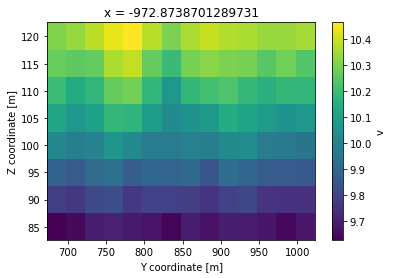

In [41]:
pl_mc.data.ffield.v.isel(x = 0).mean(axis =0).plot()

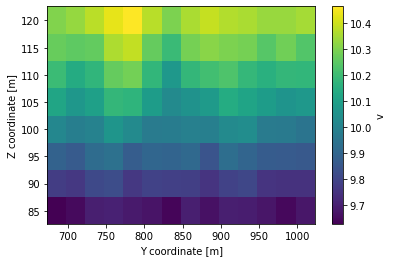

In [43]:
pl_mc.data._ffield.v.isel(time = range(0,230,1)).mean(axis = 2).plot()

In [7]:
pl_mc.project_to_los('koshava', 'power_law')

In [9]:
pl_mc.reconstruct_wind('koshava')